## Process and Describe Project Targets

In [1]:
import pandas as pd
import geopandas as gpd
import json
from matplotlib import pyplot as plt
import amanda

In [2]:
df = pd.read_csv('./cleaned_IL_sd.csv.gz', compression='gzip')

In [3]:
df, df_targets = amanda.process_targets(df)

In [4]:
df_targets.describe()

,geo_12,Week,device_count,fraction_of_devices_home,fraction_of_devices_work,fraction_time_away_all,fraction_time_away_leave
count,5.806800e+04,58068.000000,58068.000000,58068.000000,58068.000000,58068.000000,58068.000000
mean,1.707888e+11,15.500121,76.383041,0.420320,0.080829,0.146488,0.252911
std,5.958080e+08,1.707810,64.779606,0.090854,0.029243,0.047715,0.058214
min,1.700100e+11,13.000000,5.000000,0.007454,0.017948,0.006444,0.014207
25%,1.703180e+11,14.000000,42.714286,0.358292,0.060764,0.119539,0.219172
50%,1.704384e+11,16.000000,60.285714,0.424365,0.076296,0.141214,0.245395
75%,1.711796e+11,17.000000,87.857143,0.484775,0.095382,0.165675,0.276345
max,1.720303e+11,18.000000,1384.285714,0.755880,0.482143,0.792599,0.806382


Text(0.5, 1.0, 'Fraction of Devices Completely at Home')

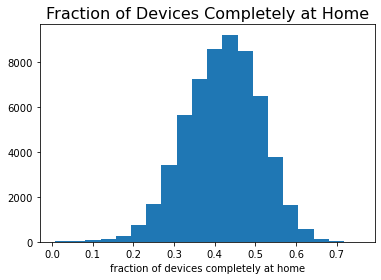

In [5]:
plt.hist(df_targets['fraction_of_devices_home'], bins=20)
plt.xlabel('fraction of devices completely at home')
plt.title('Fraction of Devices Completely at Home', fontsize=16)

Text(0.5, 1.0, 'Fraction of Devices Exhibiting Full or Part Time Work Behavior')

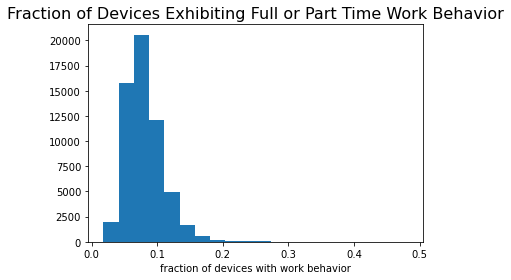

In [6]:
plt.hist(df_targets['fraction_of_devices_work'], bins=20)
plt.xlabel('fraction of devices with work behavior')
plt.title('Fraction of Devices Exhibiting Full or Part Time Work Behavior', fontsize=16)

Text(0.5, 1.0, 'Average Fraction of Time Away from Home per total devices')

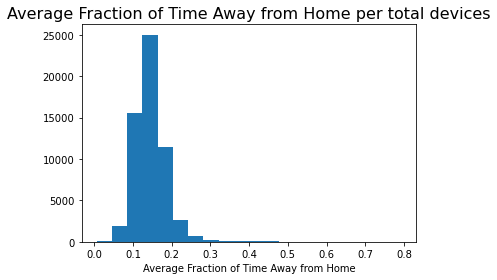

In [7]:
plt.hist(df_targets['fraction_time_away_all'], bins=20)
plt.xlabel('Average Fraction of Time Away from Home')
plt.title('Average Fraction of Time Away from Home per total devices', fontsize=16)

Text(0.5, 1.0, 'Average Fraction of Time Away from Home per devices that leave')

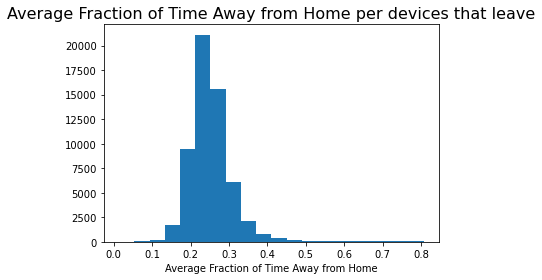

In [8]:
plt.hist(df_targets['fraction_time_away_leave'], bins=20)
plt.xlabel('Average Fraction of Time Away from Home')
plt.title('Average Fraction of Time Away from Home per devices that leave', fontsize=16)

In [9]:
df_targets.corr()

,geo_12,Week,device_count,fraction_of_devices_home,fraction_of_devices_work,fraction_time_away_all,fraction_time_away_leave
geo_12,1.000000,-0.000036,0.168569,-0.287090,0.102488,0.085159,-0.072160
Week,-0.000036,1.000000,-0.015923,-0.121468,0.040357,-0.017939,-0.099690
device_count,0.168569,-0.015923,1.000000,0.035867,-0.248311,-0.055936,-0.069894
fraction_of_devices_home,-0.287090,-0.121468,0.035867,1.000000,-0.357083,-0.622629,-0.151861
fraction_of_devices_work,0.102488,0.040357,-0.248311,-0.357083,1.000000,0.215106,0.081187
fraction_time_away_all,0.085159,-0.017939,-0.055936,-0.622629,0.215106,1.000000,0.843620
fraction_time_away_leave,-0.072160,-0.099690,-0.069894,-0.151861,0.081187,0.843620,1.000000


In [10]:
df_targets.drop(['device_count'], axis=1, inplace=True)

In [11]:
df_targets.to_csv('COVID_mobility_targets.csv', header=True, index=False)

In [12]:
df_past = pd.read_csv('./social_distancing_data_2019.csv.gz', compression='gzip')
df_past.head()

,,,origin_census_block_group,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,at_home_by_each_hour,part_time_work_behavior_devices,full_time_work_behavior_devices,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home
170311201001,2019-03-03T00:00:00-06:00,2019-03-04T00:00:00-06:00,100,586,"{""16001-50000"":8,""0"":29,"">50000"":1,""2001-8000""...","{""16001-50000"":61,"">50000"":303,""<1000"":38,""200...",31,1035,"{""721-1080"":20,""361-720"":12,""61-360"":18,""<60"":...","[75,78,73,71,71,78,69,69,65,62,53,55,54,59,56,...",10,2,"{""170318195001"":1,""170314403004"":1,""1704384651...",4,86,153,"{""21-45"":3,""541-600"":1,""46-60"":6,""721-840"":2,""...",92,"{""0-25"":7,""76-100"":74,""51-75"":10,""26-50"":6}",897,202,1888
170311604003,2019-03-03T00:00:00-06:00,2019-03-04T00:00:00-06:00,39,10847,"{""16001-50000"":1,""0"":13,"">50000"":2,""2001-8000""...","{""16001-50000"":92,"">50000"":308,""<1000"":47,""200...",18,612,"{""721-1080"":3,""361-720"":11,""61-360"":5,""<60"":5,...","[22,23,25,24,22,22,23,25,25,22,20,19,18,16,17,...",2,4,"{""170311603003"":1,""170311604001"":2,""1703180160...",3,10,129,"{""21-45"":2,""46-60"":1,""721-840"":1,""1201-1320"":1...",98,"{""0-25"":2,""76-100"":29,""51-75"":1,""26-50"":4}",742,165,8185
170312002002,2019-03-03T00:00:00-06:00,2019-03-04T00:00:00-06:00,96,1844,"{""16001-50000"":3,""0"":46,"">50000"":3,""2001-8000""...","{""16001-50000"":65,"">50000"":256,""<1000"":33,""200...",43,811,"{""721-1080"":17,""361-720"":11,""61-360"":14,""<60"":...","[56,59,60,62,59,60,56,56,58,55,55,52,51,44,44,...",4,1,"{""170311906022"":1,""170312301001"":1,""1703183200...",5,13,291,"{""21-45"":3,""481-540"":2,""541-600"":1,""46-60"":5,""...",98,"{""0-25"":10,""76-100"":66,""51-75"":9,""26-50"":7}",769,142,4125
170314212001,2019-03-03T00:00:00-06:00,2019-03-04T00:00:00-06:00,41,2632,"{""16001-50000"":1,""0"":21,""2001-8000"":9,""1-1000""...","{""16001-50000"":1,""2001-8000"":34,""8001-16000"":4...",21,736,"{""721-1080"":6,""361-720"":8,""61-360"":7,""<60"":3,""...","[19,16,19,19,21,20,20,22,20,20,21,22,21,16,16,...",1,1,"{""170316809004"":1,""170314402012"":1,""1703184360...",1,0,110,"{""21-45"":1,""46-60"":1,""301-360"":1,""<20"":22,""61-...",100,"{""0-25"":2,""76-100"":27,""51-75"":1,""26-50"":2}",756,121,2267
170314913001,2019-03-03T00:00:00-06:00,2019-03-04T00:00:00-06:00,58,19953,"{""16001-50000"":7,""0"":29,"">50000"":1,""2001-8000""...","{""16001-50000"":18,"">50000"":163,""<1000"":242,""20...",31,791,"{""721-1080"":13,""361-720"":6,""61-360"":3,""<60"":11...","[24,34,30,34,31,33,34,33,34,32,33,30,26,29,28,...",3,1,"{""170314903002"":1,""170319801001"":1,""3906102540...",3,0,149,"{""21-45"":2,""481-540"":2,""721-840"":2,""1201-1320""...",100,"{""0-25"":6,""76-100"":42,""51-75"":4,""26-50"":3}",736,159,83966
